In [112]:
%matplotlib inline
import astropy
import astropy.table
import numpy
import matplotlib.pyplot as plt
import os
from astropy.table import join
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.nddata import Cutout2D
from astropy.wcs import WCS

In [119]:
# image = fits.getdata('/home/pipkin/VIP/object1_f150w_sci.fits')
with fits.open('/home/pipkin/VIP/HST_IMAGES/object2_f160w_sci.fits') as hdulist:
    image=hdulist[0].data
    w=WCS(hdulist[0].header)

In [120]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 214.825  52.825  
CRPIX : -9422.5  6161.5  
CD1_1 CD1_2  : -5.389915e-06  -6.355569e-06  
CD2_1 CD2_2  : -6.355569e-06  5.389915e-06  
NAXIS : 1001  1001

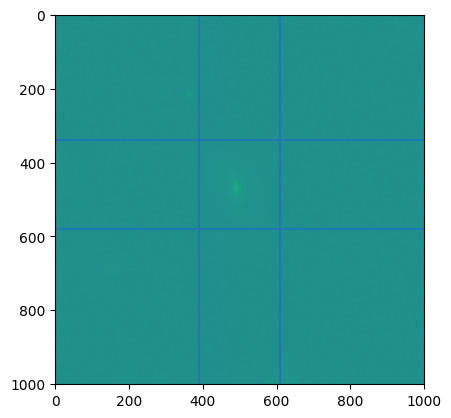

In [121]:
plt.imshow(image, vmin = -1, vmax = 1)
plt.axhline(340)
plt.axhline(580)
plt.axvline(390)
plt.axvline(610)
plt.show()

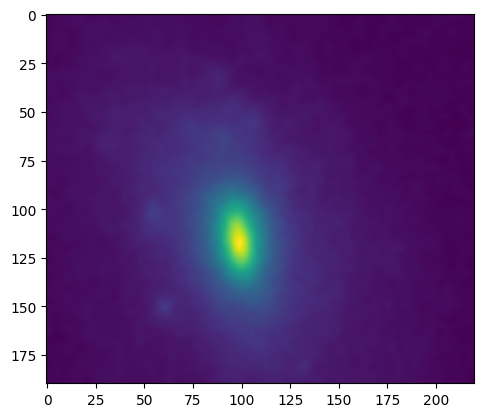

In [123]:
position = (500, 450)
size = (190, 220)
cutout2 = Cutout2D(image, position, size, wcs = w)
plt.imshow(cutout2.data)
plt.show()
#, vmin = -1, vmax = 1,

In [117]:
wcs = cutout1.wcs
header = wcs.to_header()

In [100]:
print(header)

WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =               -390.0 / Pixel coordinate of reference point            CRPIX2  =               -405.0 / Pixel coordinate of reference point            CDELT1  =                  1.0 / Coordinate increment at reference point        CDELT2  =                  1.0 / Coordinate increment at reference point        CRVAL1  =                  0.0 / Coordinate value at reference point            CRVAL2  =                  0.0 / Coordinate value at reference point            LATPOLE =                 90.0 / [deg] Native latitude of celestial pole        WCSNAME = 'DEFAULTS'           / Coordinate system title                        MJDREF  =                  0.0 / [d] MJD of fiducial time                       END                                                                                                                                                                                                     

In [118]:
hdu = fits.PrimaryHDU(cutout1.data, header = header)
hdu.writeto('cutout1_hst_.fits', overwrite = True)

In [9]:
table = astropy.table.Table.read("/home/pipkin/VIP/JWST_IMAGES/cutout1_jwst.cat", format='ascii')

In [10]:
table

ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,FWHM_IMAGE,NUMBER,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,FLUX_RADIUS,FLUX_RADIUS_1,MAGERR_APER,MAGERR_APER_1,MAGERR_APER_2,MAG_APER,MAG_APER_1,MAG_APER_2,FLAGS,PETRO_RADIUS,ISOAREA_IMAGE,MU_MEAN_MODEL,MU_EFF_MODEL,SPHEROID_SERSICN
deg,deg,mag,mag,pix,,pix,pix,pix,pix,pix,pix,mag,mag,mag,mag,mag,mag,,,pix2,mag / arcsec2,mag / arcsec2,
float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64
214.9053038,52.8509132,18.226,0.0007,4.97,1,108,87,107.5322,87.5966,29.816,52.107,0.0014,0.0013,0.0014,21.9153,21.3213,20.8402,27,7.26,8950,30.7067,32.1663,4.543
214.9052551,52.8519807,25.2374,0.0829,31.1,2,14,177,12.214,173.2472,9.984,15.258,0.3366,0.1792,0.1385,28.6552,27.4461,26.7428,19,10.56,144,32.39,32.9493,0.729
214.9053806,52.8498887,25.7566,0.0874,27.43,3,192,11,197.5941,3.7404,7.845,10.827,0.249,0.1969,0.1449,28.4069,27.659,26.9671,27,10.56,105,32.3291,33.0024,0.948
214.9046454,52.8517414,24.0732,0.0297,34.67,4,65,190,62.6993,188.3204,42.105,44.569,0.1704,0.1416,0.1135,28.0041,27.3589,26.7698,27,10.56,170,32.7108,33.5254,1.284
214.9047819,52.851789,24.9576,0.0674,33.93,5,54,187,51.9491,184.4799,9.464,27.151,0.199,0.1258,0.091,28.1469,27.1487,26.3439,19,10.56,182,32.6999,33.5036,1.256
214.9050301,52.8519102,25.0692,0.0772,25.36,6,41,188,29.2139,180.2013,10.208,17.868,0.2025,0.1336,0.1048,28.217,27.2379,26.5214,19,10.56,133,32.744,33.6095,1.425
214.9054411,52.8519449,26.0337,0.1075,16.32,7,5,158,6.7585,160.1955,5.718,8.389,0.2538,0.159,0.1277,28.2924,27.342,26.713,19,10.56,66,32.3426,33.0539,1.027
214.9050888,52.8498256,24.7524,0.0441,47.48,8,206,28,217.0616,14.9462,12.104,17.737,0.1526,0.1096,0.0915,27.8878,27.0371,26.4743,27,10.56,353,31.5112,32.0557,0.715


In [11]:
from astropy.visualization import ImageNormalize, ZScaleInterval

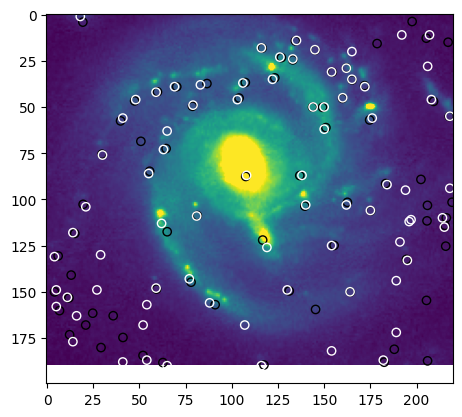

In [12]:
norm = ImageNormalize(cutout1.data, interval = ZScaleInterval())
plt.imshow(cutout1.data, norm = norm)
plt.scatter(table['X_IMAGE'], table['Y_IMAGE'],facecolors='none', edgecolors='black') #s=1, alpha=0.3, color='red', marker='o')
plt.scatter(table['XPEAK_IMAGE'], table['YPEAK_IMAGE'],facecolors='none', edgecolors='w') #s=1, alpha=0.3, color='blue', marker='o')
#plt.xlabel('Right Ascension (J2000)')
#plt.ylabel('Declination (J2000)')
#plt.title('RA & DEC')
#plt.tight_layout()
plt.show()
#plt.savefig("JWST_detects")

In [13]:
table2 = astropy.table.Table.read("/home/pipkin/VIP/TEST_FILE/isaiah.cat", format='ascii')

In [14]:
table2

NUMBER,X_IMAGE,Y_IMAGE,XWIN_IMAGE,YWIN_IMAGE,ALPHA_J2000,DELTA_J2000,ALPHAPEAK_J2000,DELTAPEAK_J2000,XMIN_IMAGE,YMIN_IMAGE,XMAX_IMAGE,YMAX_IMAGE,ISOAREA_IMAGE,A_IMAGE,B_IMAGE,ERRA_IMAGE,ERRB_IMAGE,THETA_IMAGE,ERRTHETA_IMAGE,ELLIPTICITY,ELONGATION,KRON_RADIUS,FLUX_RADIUS,FLUX_RADIUS_1,FLUX_RADIUS_2,FWHM_IMAGE,CLASS_STAR,FLAGS,BACKGROUND,MAG_ISO,MAGERR_ISO,FLUX_ISO,FLUXERR_ISO,MAG_ISOCOR,MAGERR_ISOCOR,FLUX_ISOCOR,FLUXERR_ISOCOR,MAG_AUTO,MAGERR_AUTO,FLUX_AUTO,FLUXERR_AUTO,MAG_BEST,MAGERR_BEST,FLUX_BEST,FLUXERR_BEST,MAG_APER,MAG_APER_1,MAG_APER_2,MAG_APER_3,MAG_APER_4,MAG_APER_5,MAG_APER_6,MAG_APER_7,MAG_APER_8,MAG_APER_9,MAG_APER_10,MAG_APER_11,MAGERR_APER,MAGERR_APER_1,MAGERR_APER_2,MAGERR_APER_3,MAGERR_APER_4,MAGERR_APER_5,MAGERR_APER_6,MAGERR_APER_7,MAGERR_APER_8,MAGERR_APER_9,MAGERR_APER_10,MAGERR_APER_11,FLUX_APER,FLUX_APER_1,FLUX_APER_2,FLUX_APER_3,FLUX_APER_4,FLUX_APER_5,FLUX_APER_6,FLUX_APER_7,FLUX_APER_8,FLUX_APER_9,FLUX_APER_10,FLUX_APER_11,FLUXERR_APER,FLUXERR_APER_1,FLUXERR_APER_2,FLUXERR_APER_3,FLUXERR_APER_4,FLUXERR_APER_5,FLUXERR_APER_6,FLUXERR_APER_7,FLUXERR_APER_8,FLUXERR_APER_9,FLUXERR_APER_10,FLUXERR_APER_11
,pix,pix,pix,pix,deg,deg,deg,deg,pix,pix,pix,pix,pix2,pix,pix,pix,pix,deg,deg,,,,pix,pix,pix,pix,,,ct,mag,mag,ct,ct,mag,mag,ct,ct,mag,mag,ct,ct,mag,mag,ct,ct,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct,ct
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,209.0918,46.7914,208.5034,46.9891,214.9048252,52.8500481,214.9048239,52.8500498,201,38,214,56,161,4.559,2.556,0.32619,0.18977,60.25,63.14,0.44,1.784,3.45,3.246,6.472,9.905,14.15,0.0,19,0.07128057,-2.9795,0.0143,15.55225,0.2046196,-3.3073,0.0284,21.0337,0.5507555,-3.5143,0.0137,25.45111,0.3215712,-3.3073,0.0284,21.0337,0.5507555,0.9121,-0.524,-1.3042,-1.8163,-2.4172,-2.8008,-3.0651,-3.2841,-3.6307,-3.8857,-4.2542,-4.59,0.0628,0.0323,0.0233,0.0193,0.0164,0.0151,0.0148,0.0145,0.0137,0.0128,0.0114,0.0103,0.431673,1.620359,3.324074,5.327489,9.266125,13.19253,16.82779,20.5892,28.33224,35.83255,50.3112,68.54599,0.02495285,0.04813345,0.07133984,0.09478553,0.139538,0.1838415,0.2289091,0.2743953,0.3561716,0.4207726,0.5297079,0.6497177
2,178.5982,16.2421,178.4367,16.6684,214.9054189,52.8500768,214.905409,52.8500666,176,14,181,19,25,1.672,1.414,0.46372,0.38591,42.15,43.67,0.154,1.182,4.0,2.315,3.904,5.258,9.21,0.0,16,0.07128057,-0.5093,0.0537,1.598551,0.07898273,-1.6577,0.0827,4.603228,0.3504103,-1.6544,0.037,4.589361,0.156439,-1.6544,0.037,4.589361,0.156439,2.3751,0.8166,-0.0774,-0.6084,-1.3324,-1.8044,-2.1883,-2.4843,-2.9648,-3.3426,-3.8296,-4.3209,0.1974,0.0945,0.0633,0.0522,0.0405,0.0351,0.0308,0.0283,0.0243,0.0212,0.0174,0.014,0.1121953,0.471359,1.073882,1.75135,3.411501,5.269586,7.50417,9.856431,15.34351,21.72909,34.02784,53.50248,0.02039298,0.04103589,0.06256649,0.08416862,0.127326,0.170226,0.2128923,0.2568247,0.3439985,0.4246923,0.545139,0.6880465
3,18.8591,3.6557,18.4028,2.2419,214.9069789,52.8510232,214.907004,52.8510197,9,1,28,12,163,3.685,2.359,0.16331,0.1055,8.98,8.15,0.36,1.562,2.09,1.911,2.979,4.486,17.69,0.499,24,0.07128057,-3.8518,0.0063,34.72967,0.2003466,-3.9199,0.0089,36.98106,0.3017476,-3.7157,0.0055,30.63874,0.1564871,-3.7157,0.0055,30.63874,0.1564871,

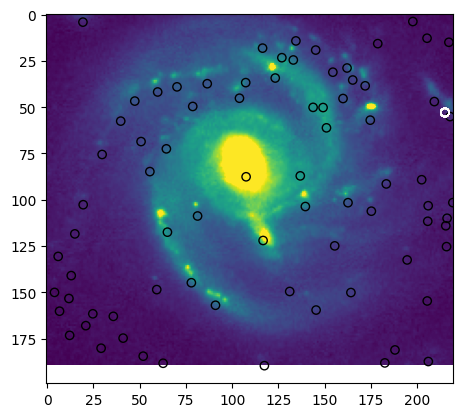

In [15]:
norm = ImageNormalize(cutout1.data, interval = ZScaleInterval())
plt.imshow(cutout1.data, norm = norm)
plt.scatter(table['X_IMAGE'], table['Y_IMAGE'],facecolors='none', edgecolors='black') #s=1, alpha=0.3, color='red', marker='o')
plt.scatter(table2['ALPHA_J2000'], table2['DELTA_J2000'],facecolors='none', edgecolors='red') #s=1, alpha=0.3, color='red', marker='o')
plt.scatter(table2['ALPHAPEAK_J2000'], table2['DELTAPEAK_J2000'],facecolors='none', edgecolors='white') #s=1, alpha=0.3, color='red', marker='o')

In [16]:
#f = open("Steve_cat.ds9", "w")

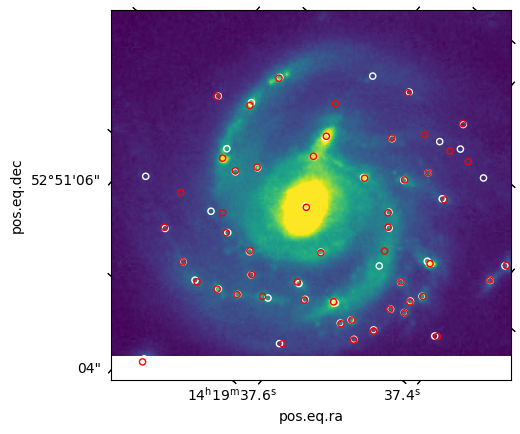

In [17]:
ax = plt.subplot(projection=wcs)
plt.imshow(cutout1.data, norm = norm)
ax.scatter(table2['ALPHA_J2000'], table2["DELTA_J2000"], transform=ax.get_transform('world'), s=20, edgecolor='white', facecolor='none')
#ax.scatter(table['ALPHA_J2000'], table["DELTA_J2000"], transform=ax.get_transform('world'), s=20, edgecolor='black', facecolor='none')
ax.scatter(table2['ALPHAPEAK_J2000'], table2["DELTAPEAK_J2000"], transform=ax.get_transform('world'), s=20, edgecolor='red', facecolor='none')

In [25]:
import scipy as sp
from scipy import ndimage, datasets
from scipy.ndimage import median_filter
from scipy import signal
from scipy import ndimage, datasets

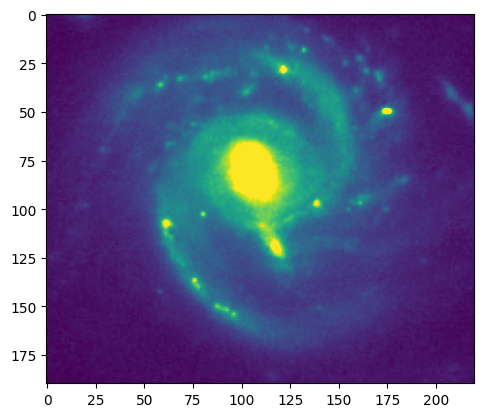

In [20]:
plt.imshow(cutout1.data, norm = norm)

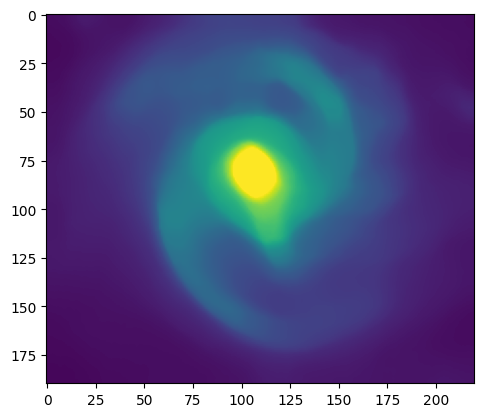

In [56]:
filter_image_hst1 = ndimage.median_filter(cutout1.data, size=20)
plt.imshow(filter_image_hst1, norm = norm)

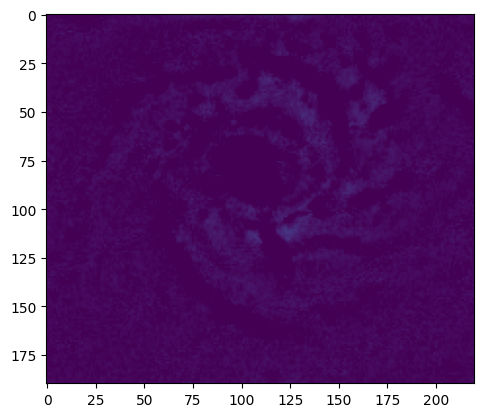

In [68]:
subtracted_image_hst1 = (filter_image_hst1 - cutout1.data)
plt.imshow(subtracted_image_hst1, norm = norm)

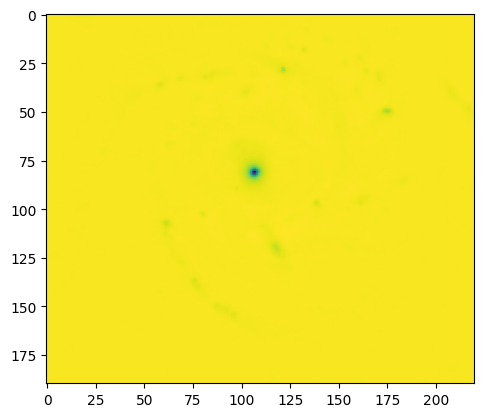

In [65]:
plt.imshow(subtracted_image_hst1)